In [143]:
%matplotlib inline

In [144]:
import matplotlib.pyplot as plt

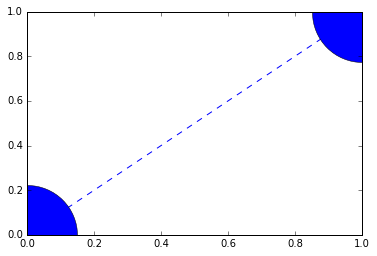

In [145]:
x=[0,1]
y=[0,1]

plt.plot(x,y, "o--",markersize=100)

In [146]:
from __future__ import division #skip
import time

import numpy as npy

from sklearn.svm import SVR #sklearn/svn directoryの中のclasses.pyファイルからSVRクラスをimportしている。
#.svmのあとに.classesを付けても良い。
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.kernel_ridge import KernelRidge
import pylab as pl #pylabはmatplotlib.pyplotと同じ意味

In [147]:
random_generator=npy.random.RandomState(1) #randomクラスのオブジェクト。乱数生成期の初期化。0というseedで初期化。

In [148]:
for i in xrange(1): #0から99までの列
    print random_generator.rand()

0.417022004703


In [149]:
#Generate sample data
Num_of_data=10000
divisor=5
assert Num_of_data%divisor==0,"Needs that Num_of_data%divisor==0" #assertは中がfalseのときにエラーを出す。

X=5*random_generator.rand(Num_of_data, 1)
print X
y=npy.sin(X).ravel() #ravel()を付けると行列がリストになる、numpyでは行列はリストの中にリストになると言える
print(y)
print(y[::2]) #syntax error 文法エラー #x::yではxからy個に一個値が出力される # x:: （y無し）ではy=1となる、::y（x無し）ではx=0となる
#Add noise to tagets
y[::divisor] += 3 * (0.5 - random_generator.rand(X.shape[0] // divisor)) 
#0.5 here behaves as the matrix with the same number of rows and columns as random_generator.rand(...).
#X.shape=(num_of_rows,num_of_columns). Therefore, X.shape[1]=num_of_rows, 
# for int types a,b,  a//b =a%b as in C language. i.e. devision of two integers, but does not return the remainder.


[[  3.60162247e+00]
 [  5.71874087e-04]
 [  1.51166286e+00]
 ..., 
 [  5.40218282e-01]
 [  3.81396889e+00]
 [  3.82748480e+00]]
[ -4.43974821e-01   5.71874056e-04   9.98252126e-01 ...,   5.14323201e-01
  -6.22846776e-01  -6.33363657e-01]
[-0.44397482  0.99825213  0.44546446 ..., -0.32567712  0.29329201
 -0.62284678]


In [150]:
X_plot = npy.linspace(0, 5, 100000)[:, None]
#linspace(a,b,num) return a list[a,...,b] with num elements.
#[:,None] converts a list to a matrix which is a column vector.

In [151]:
#Generate sample data
Num_of_data=10000
divisor=5

assert Num_of_data%divisor == 0, "the remainder of Num of data divided by divisor must be zero"



X=divisor*random_generator.rand(Num_of_data, 1)
print X
print X.shape[0]
y=npy.sin(X).ravel() #ravel()を付けると行列がリストになる、numpyでは行列はリストの中にリストになると言える
print(y)
print(y[::2]) #syntax error 文法エラー #x::yではxからy個に一個値が出力される # x:: （y無し）ではy=1となる、::y（x無し）ではx=0となる
#Add noise to tagets
y[::divisor] += 3 * (0.5 - random_generator.rand(X.shape[0] // divisor)) 
#0.5 here behaves as the matrix with the same number of rows and columns as random_generator.rand(...).
#X.shape=(num_of_rows,num_of_columns). Therefore, X.shape[1]=num_of_rows, 
# for int types a,b,  a//b =a/b as in C language. i.e. devision of two integers, but does not return the remainder.


[[ 2.90202915]
 [ 0.65114669]
 [ 1.31794453]
 ..., 
 [ 1.06603718]
 [ 2.00588743]
 [ 1.32533482]]
10000
[ 0.23727862  0.60609887  0.96820294 ...,  0.87529098  0.90683165
  0.97002528]
[ 0.23727862  0.96820294  0.35834003 ...,  0.38994865 -0.99275443
  0.90683165]


In [152]:
#Fit regression model
train_size = 100 #準備したデータの内 100個を用いて回帰する
svr = GridSearchCV(SVR(kernel="rbf", gamma=-0.1), cv=5,
                    param_grid={"C": [1e0, 1e1, 1e2, 1e3], 
                                "gamma":npy.logspace(-2, 2, 5)}, scoring="r2")
# gamma is "Kernel coefficient". In the case of rbf, it is in the exponential term.
# Cで4パターン、gammaで5パターンの合計 20通りで SVR の学習・評価をする、各C, gammmaで5回クロスバリデーションする
# "scoring ="で mertics を決定できる、何も書かない（デフォルト）だと、r2 になる

t0=time.time()
svr.fit(X[:train_size], y[:train_size])
svr_fit_time=time.time()-t0
print("SVR complexity and bandwith selected and model fitted in %.3f s"
     % svr_fit_time)

#best_estimator_ は最も高いスコアのモデルの結果を出力する
sv_ratio=svr.best_estimator_.support_.shape[0] / train_size 
print("Support vector ratio: %.3f" % sv_ratio)

t0=time.time()
y_svr_besr=svr.best_estimator_.predict(X_plot) #predict は　最も高いスコアのモデル予測結果を出力する
svr_predict_time=time.time()-t0
print("SVR prediction for %d inputs in %.3f s"
        %(X_plot.shape[0], svr_predict_time))

t0=time.time()
y_svr=svr.predict(X_plot)
svr_best_predict_time=time.time()-t0
print("SVR prediction for %d inputs in %.3f s"
        %(X_plot.shape[0], svr_best_predict_time))

SVR complexity and bandwith selected and model fitted in 1.184 s
Support vector ratio: 0.300
SVR prediction for 100000 inputs in 0.124 s
SVR prediction for 100000 inputs in 0.063 s


In [153]:
#svr.cv_results_ #svrの結果をまとめて表示

[ 0  2  5  8 10 11 20 25 30 35 39 40 43 45 46 50 52 53 55 60 65 70 71 75 78
 80 85 90 95 98]
[ 0  2  5  8 10 11 20 25 30 35]


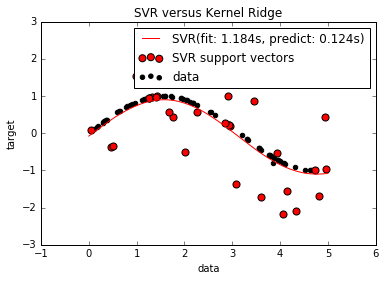

In [154]:
sv_ind = svr.best_estimator_.support_
print sv_ind #sv_ind は、support vectorに選ばれたデータの番号を示す
print sv_ind[:10]
plt.scatter(X[sv_ind], y[sv_ind], c="r", s=50, label="SVR support vectors", zorder=2)
#this is as same as plt.plot(X[sv_ind], y[sv_ind], c="r", marker='o',linestyle="none",label="SVR support vectors", zorder=2)
#zorder の値が大きいグラフを手前に表示する

# plt.scatter(X[[0,2,5,8,10,11,20,25,30,35,39,40,43,45,46,50,52,53,55,60,65,70,71,75,78
# ,80,85,90,95,98]], y[[[0,2,5,8,10,11,20,25,30,35,39,40,43,45,46,50,52,53,55,60,65,70,71,75,78
# ,80,85,90,95,98]]],c="k", label="data", zorder=2)

plt.scatter(X[:100],y[:100],c="k", label="data", zorder=1)
#plt.hold("on") hold is "on" by default!!
plt.plot(X_plot, y_svr, c="r", label="SVR(fit: {0:.3f}s, predict: {1:.3f}s)".format(svr_fit_time, svr_predict_time))
#same as plt.plot(X_plot, y_svr, c='r',label='SVR (fit: %.3fs, predict: %.3fs)' % (svr_fit, svr_predict))
plt.xlabel("data")
plt.ylabel("target")
plt.title("SVR versus Kernel Ridge")
plt.legend() #plt.legend()で凡例を表示

#plt.show()でグラフを表示する

[   10    31   100   316  1000  3162 10000]


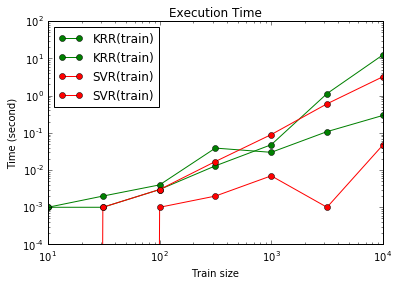

In [155]:
#visualize training and prediction time
plt.figure()

#Generate sample date
data_scale=4
Num_of_data=10**data_scale
divisor=5
assert Num_of_data%divisor==0, "Num_of_data%divisor must be zero."

X= 5 * random_generator.rand(Num_of_data, 1) #uniform distribution（一様分布に従う乱数） between 0 to 
y= npy.sin(X).ravel() #numpyの行列表現はリストの中にリスト、ravel()はnumpy行列をリストにする
y[::5] += 3 * (0.5 - random_generator.rand(X.shape[0]//divisor))
sizes = npy.logspace(1, data_scale, 7, dtype=npy.int)
#logspace(start,stop,num=50,endpoint=True,base=10.0,dtype=None) 
#The actual start point is in fact base^start. Same for the end point.
# dtype=int or dtype=np.int restricts the result to be int.
# However, the resulting number greater than 2^31 is to be -2147483648=-2^31
print sizes

for name, estimator in {"KRR":KernelRidge(kernel="rbf", alpha=0.1, 
                        gamma=10),"SVR":SVR(kernel="rbf", C=1e1, gamma=10)}.items():#items() makes a dictionary to be a list of tuples.
        train_time=[]
        test_time=[]
        for train_test_size in sizes:
            t0=time.time()
            estimator.fit(X[:train_test_size], y[:train_test_size])
            train_time.append(time.time()-t0)
            
            t0 = time.time()
            estimator.predict(X_plot[:1000])
            test_time.append(time.time()-t0)
            
        plt.plot(sizes, train_time, "o-", color ="r"if name =="SVR"else "g", label="%s(train)" %name)
        plt.plot(sizes, test_time, "o-", color ="r"if name =="SVR"else "g", label="%s(train)" %name)
        
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Train size")
plt.ylabel("Time (second)")
plt.title("Execution Time")
plt.legend(loc="best")

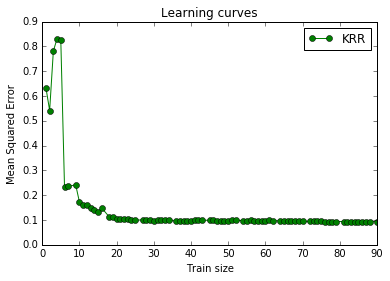

In [156]:
#Visualize learning curves
plt.figure()

svr2=SVR(kernel="rbf", C=1e1, gamma=0.1)
kr= KernelRidge(kernel="rbf", alpha = 0.1, gamma=0.1)
#train_sizes, train_scores_svr, test_scores_svr = \
    #learning_curve(svr, X[:100], y[:100], train_sizes=npy.linspace(0.1, 1, 10), scoring="neg_mean_squared_error", cv=10)
    # \ の後には記載しない
    #scoring method "mean_squared_error" does not exist anymore. We have to use "neg" version instead. 
train_sizes_abs, train_scores_kr, test_scores_kr =\
    learning_curve(kr, X[:100:], y[:100], train_sizes=[(x+1.0)/80.0 for x in npy.arange(80)], scoring="neg_mean_squared_error", cv=10)
    
#plt.plot(train_sizes, -test_scores_svr.mean(1), "o-", color="r", label="SVR")
plt.plot(train_sizes_abs, -test_scores_kr.mean(1), "o-", color="g", label="KRR")

#test_scores_kr is a "train_sizes" x "cv" matrix.
#test_scores_kr.mean(0) returns the set of the average of each column. i.e. each cv chunk.
#test_scores_kr.mean(1) returns the set of the average of each row. i.e. each train_size.
#test_scores_kr.mean(2) returns of course error.


plt.xlabel("Train size")
plt.ylabel("Mean Squared Error")
plt.title("Learning curves")
plt.legend(loc="best")

plt.show()




In [157]:
some_string="{:.5f}s"
print some_string
formatted_string=some_string.format(1.23000000)
print formatted_string

{:.5f}s
1.23000s


In [158]:
sv_ind[0]

0

In [159]:
print X[sv_ind[[0,1]]]
print X[[0,2]]

[[ 0.80549719]
 [ 0.30258423]]
[[ 0.80549719]
 [ 0.30258423]]


In [160]:
sv_ind[[0,2,5,8,10,11,20,25,30,35,39,40,43,45,46,50,52,53,55,60,65,70,71,75,78
,80,85,90,95,98]]

IndexError: index 30 is out of bounds for axis 0 with size 30

In [ ]:
X.shape[0] // 3

In [ ]:
print  3 * (0.5 - random_generator.rand(X.shape[0]//divisor))

In [ ]:
npy.arange(100)[::5]

In [ ]:
fruits_color=[('apple','red'),('banana','yellow'),('grape','purple')]
fruits_color_init=[('apple','red','a'),('banana','yellow','b'),('grape','purple','g')]

In [ ]:
for fc in fruits_and_color:
    print fc

print

for f,c in fruits_color:
    print "fruit is "+f+", and color is "+c 
    
print

for fci in fruits_color_init:
    print fci

print


for f,c,i in fruits_color_init:
    print "fruit is "+f+", and color is "+c +', and initial letter is '+i

In [ ]:
fruits_color={'apple':1,'banana':2,'grape':3}.items()

In [ ]:
for color, value in fruits_color:
    print "color is "+color+", value is "+str(value) 

In [ ]:
print {"KRR": KernelRidge(kernel='rbf', alpha=0.1,
                                           gamma=10),
                        "SVR": SVR(kernel='rbf', C=1e1, gamma=10)}
print
print {"KRR": KernelRidge(kernel='rbf', alpha=0.1,
                                           gamma=10),
                        "SVR": SVR(kernel='rbf', C=1e1, gamma=10)}.items()

In [ ]:
test_time=[]

t0= time.time()
print(t0)

In [ ]:
t1=time.time()
test_time.append(time.time()-t0)
print(t1)
print(test_time)

In [ ]:
numbers=[1,2,3,4,5,6,7,8,9,10]
for num in numbers:
        
    int_type="odd" if num%2!=0 else "even"#in C++, int_type= (num%2!=0)? "odd" : "even";
    print str(num)+"type:"+int_type

In [ ]:
def multiple_return_value():
    return 0,1,{2:"abc"}

In [ ]:
results= multiple_return_value()
result1,result2,result3=multiple_return_value()

print "results:"+str(results)
print "result1:"+str(result1)+", result2:"+str(result2)+", result3:"+str(result3)

In [ ]:
print npy.linspace(0.1, 1, 10)

In [ ]:
npy.arange(10)

In [ ]:
[x/10.0 for x in npy.arange(10)]

In [ ]:
lst = [[i] * 3 for i in range(3)]
print lst    

In [ ]:
[(x+1.0)/100.0 for x in npy.arange(100)]